In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob
import pandas as pd
import json
import itertools

In [2]:
# load labels
with open("/home/lrabuzin/ETH/Sem3/sempro/train.json",'r') as f:
    data = json.loads(f.read())
df_freeform = pd.json_normalize(data, record_path =['sequences'])
with open("/home/lrabuzin/ETH/Sem3/sempro/all_classes_val.json",'r') as f:
    data = json.loads(f.read())
df_freeform_val = pd.json_normalize(data, record_path =['sequences'])
# df = pd.json_normalize(data, record_path =['videos'])
with open("/home/lrabuzin/ETH/Sem3/sempro/all_classes_test.json",'r') as f:
    data = json.loads(f.read())
df_freeform_test = pd.json_normalize(data, record_path =['sequences'])
print(f"Number of train videos {df_freeform.shape[0]}, val videos {df_freeform_val.shape[0]}, test videos {df_freeform_test.shape[0]}")

df_freeform["number_images"]=df_freeform["annotated_image_paths"].apply(lambda x: len(x))
df_freeform_val["number_images"]=df_freeform_val["annotated_image_paths"].apply(lambda x: len(x))
df_freeform_test["number_images"]=df_freeform_test["annotated_image_paths"].apply(lambda x: len(x))

number_images_train=df_freeform["number_images"].sum()
number_images_val=df_freeform_val["number_images"].sum()
number_images_test=df_freeform_test["number_images"].sum()
number_total_images=number_images_train+number_images_val+number_images_test

print(f"Number of train images {number_images_train}, val image {number_images_val}, test images {number_images_test}")
print(f"Total number of images {number_total_images}")

Number of train videos 500, val videos 988, test videos 1421
Number of train images 107144, val image 36375, test images 52194
Total number of images 195713


In [4]:
df_freeform

,width,height,id,seq_name,dataset,neg_category_ids,not_exhaustive_category_ids,all_image_paths,segmentations,annotated_image_paths,...,track_category_ids.2,track_category_ids.3,track_category_ids.4,track_category_ids.5,track_category_ids.6,track_category_ids.7,track_category_ids.8,track_category_ids.9,track_category_ids.10,number_images
0,640,480,0,v_f69ebe5b731d3e87c1a3992ee39c3b7e,YFCC100M,"[342, 57, 651, 357, 738]","[805, 95]","[frame0391.jpg, frame0392.jpg, frame0393.jpg, ...",[{'2': {'rle': 'R]Y29e>4K>C6K5K4M3L4L5K5K5K3M7...,"[frame0391.jpg, frame0396.jpg, frame0401.jpg, ...",...,805.0,805.0,95.0,805.0,805.0,805.0,NaN,NaN,NaN,235
1,640,480,1,v_8b6283255797fc7e94f3a93947a2803,YFCC100M,"[140, 36, 653, 1186, 985, 982]",[],"[frame0151.jpg, frame0152.jpg, frame0153.jpg, ...",[{'1': {'rle': 'SPk36f>8L1O1QGBY3`0eLDY3<eLGY3...,"[frame0151.jpg, frame0156.jpg, frame0161.jpg, ...",...,133.0,805.0,805.0,554.0,805.0,NaN,NaN,NaN,NaN,235
2,640,480,3,v_9018a07931e02026b3bd6e82489d4624,YFCC100M,"[112, 955, 357, 1043, 146, 349, 85]",[],"[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",[{'2': {'rle': 'Vi^5:e>1O2N1N2YNAlDa0Q;ClD>R;D...,"[frame0001.jpg, frame0006.jpg, frame0011.jpg, ...",...,805.0,95.0,NaN,805.0,NaN,NaN,NaN,NaN,NaN,193
3,640,480,7,v_a556a65c3a85d0de0717b8cef2f219c,YFCC100M,"[693, 398, 91, 882, 209, 1031, 236]",[611],"[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",[{'3': {'rle': 'e`P52m>3L4M3N000000001O00000O1...,"[frame0001.jpg, frame0006.jpg, frame0011.jpg, ...",...,757.0,611.0,757.0,805.0,611.0,NaN,NaN,NaN,NaN,217
4,640,480,9,v_6f90a13c795ef37404d95983341df,YFCC100M,"[405, 693, 214, 1111, 790, 1186]","[805, 211]","[frame0121.jpg, frame0122.jpg, frame0123.jpg, ...",[{'1': {'rle': ']Q^63=OQ>a0O000O1N2O10O01OO200...,"[frame0121.jpg, frame0126.jpg, frame0131.jpg, ...",...,805.0,211.0,211.0,211.0,211.0,211.0,211.0,211.0,NaN,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1280,720,2975,KA3ER,Charades,"[254, 625, 480]","[74, 224, 133]","[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",[{'1': {'rle': 'Rce>8Vf0<D5K5K5K4L3K5^NlNb]OY1...,"[frame0001.jpg, frame0006.jpg, frame0011.jpg, ...",...,133.0,74.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN,181
496,1280,720,2976,I0THD,Charades,"[1152, 794]","[805, 202, 133]","[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",[{'1': {'rle': 'Rba=3]f04K6K3TZODTe0OkZO>1Kfd0...,"[frame0001.jpg, frame0006.jpg, frame0011.jpg, ...",...,202.0,202.0,202.0,133.0,202.0,202.0,202.0,202.0,NaN,181
497,1280,720,2977,AVSN8,Charades,"[74, 80, 709, 1215, 208]","[690, 851, 302]","[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",[{'1': {'rle': 'cgd:<Rf0b0^O<E6I4L4M2M4L4M1N2O...,"[frame0001.jpg, frame0006.jpg, frame0011.jpg, ...",...,NaN,1088.0,1018.0,302.0,805.0,690.0,NaN,NaN,NaN,181
498,1280,720,2978,7P0JX,Charades,[97],"[805, 133]","[frame0001.jpg, frame0002.jpg, frame0003.jpg, ...",[{'1': {'rle': 'hio13]f06I7J6J6I7J6I5LO10O100O...,"[frame0001.jpg, frame0006.jpg, frame0011.jpg, ...",...,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199


In [5]:
# create a row per image
df_freeform = df_freeform.explode(['annotated_image_paths','segmentations'])
df_freeform = df_freeform.reset_index(drop=True)
df_freeform_val = df_freeform_val.explode(['annotated_image_paths','segmentations'])
df_freeform_val = df_freeform_val.reset_index(drop=True)
df_freeform_test = df_freeform_test.explode(['annotated_image_paths','segmentations'])
df_freeform_test = df_freeform_test.reset_index(drop=True)

In [10]:
df_freeform.iloc[0]

width                                                                        640
height                                                                       480
id                                                                             0
seq_name                                      v_f69ebe5b731d3e87c1a3992ee39c3b7e
dataset                                                                 YFCC100M
neg_category_ids                                        [342, 57, 651, 357, 738]
not_exhaustive_category_ids                                            [805, 95]
all_image_paths                [frame0391.jpg, frame0392.jpg, frame0393.jpg, ...
segmentations                  {'2': {'rle': 'R]Y29e>4K>C6K5K4M3L4L5K5K5K3M7I...
annotated_image_paths                                              frame0391.jpg
track_category_ids.1                                                        95.0
track_category_ids.2                                                       805.0
track_category_ids.3        

In [4]:
# create list of objects in each frame
concat_func = lambda x: [x for x in [x[col] for col in x.index if col.startswith('track_category_ids.')] if x ==x ]
df_freeform["list_object"]=df_freeform.apply(concat_func, axis=1)
df_freeform_val["list_object"]=df_freeform_val.apply(concat_func, axis=1)
df_freeform_test["list_object"]=df_freeform_test.apply(concat_func, axis=1)

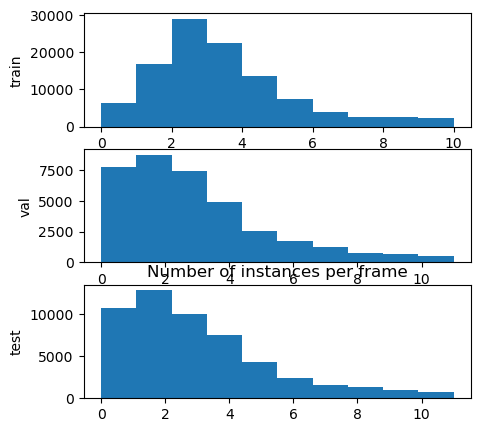

In [5]:
# create column with number of objects per frame
df_freeform["nb_objects"]=df_freeform["segmentations"].apply(lambda x: len(list(x.keys()))) 
df_freeform_val["nb_objects"]=df_freeform_val["segmentations"].apply(lambda x: len(list(x.keys()))) 
df_freeform_test["nb_objects"]=df_freeform_test["segmentations"].apply(lambda x: len(list(x.keys()))) 
fig, ax = plt.subplots(3,figsize=(5,5))
ax[0].hist(list(df_freeform["nb_objects"].values),bins=10)
ax[1].hist(list(df_freeform_val["nb_objects"].values),bins=10)
ax[2].hist(list(df_freeform_test["nb_objects"].values),bins=10)
ax[0].set_ylabel("train")
ax[1].set_ylabel("val")
ax[2].set_ylabel("test")
plt.title("Number of instances per frame")
plt.show()

In [6]:
df_freeform['list_object']

0         [95.0, 805.0, 805.0, 95.0, 805.0, 805.0, 805.0]
1         [95.0, 805.0, 805.0, 95.0, 805.0, 805.0, 805.0]
2         [95.0, 805.0, 805.0, 95.0, 805.0, 805.0, 805.0]
3         [95.0, 805.0, 805.0, 95.0, 805.0, 805.0, 805.0]
4         [95.0, 805.0, 805.0, 95.0, 805.0, 805.0, 805.0]
                               ...                       
107139                    [805.0, 1018.0, 1040.0, 1128.0]
107140                    [805.0, 1018.0, 1040.0, 1128.0]
107141                    [805.0, 1018.0, 1040.0, 1128.0]
107142                    [805.0, 1018.0, 1040.0, 1128.0]
107143                    [805.0, 1018.0, 1040.0, 1128.0]
Name: list_object, Length: 107144, dtype: object

In [7]:
# understanding the distribution of classes
train_classes=list(itertools.chain.from_iterable(list(df_freeform["list_object"].values)))
val_classes=list(itertools.chain.from_iterable(list(df_freeform_val["list_object"].values)))
test_classes=list(itertools.chain.from_iterable(list(df_freeform_test["list_object"].values)))
print(f"Number of different classes in train {len(np.unique(train_classes))}, validation {len(np.unique(val_classes))}, test {len(np.unique(test_classes))}")
total_classes=np.unique(list(itertools.chain.from_iterable(list(df_freeform["list_object"].values)+list(df_freeform_val["list_object"].values)+list(df_freeform_test["list_object"].values))))
print(f"Total number of different classes {len(total_classes)}")

Number of different classes in train 196, validation 302, test 369
Total number of different classes 482


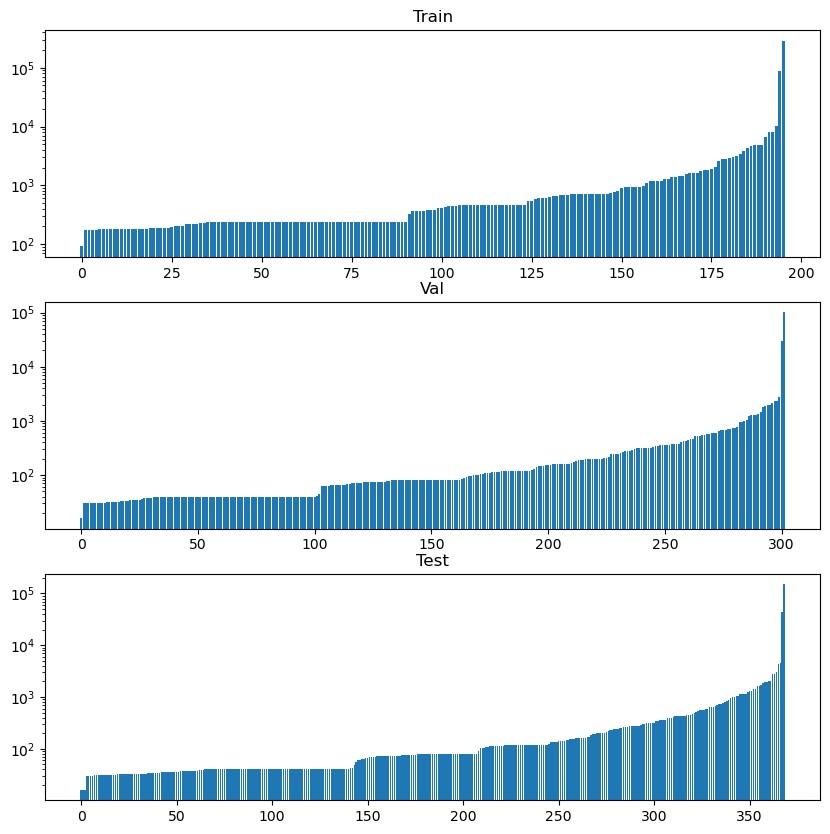

In [8]:
# plot diversity of classes 
values_train, frequencies_train = np.unique(train_classes, return_counts=True)
order_train=np.argsort(frequencies_train)[::1]
sorted_train=values_train[order_train]
sorted_frequencies_train=frequencies_train[order_train]

values_val, frequencies_val = np.unique(val_classes, return_counts=True)
order_val=np.argsort(frequencies_val)#[::1]
sorted_val=values_val[order_val]
sorted_frequencies_val=frequencies_val[order_val]

values_test, frequencies_test = np.unique(test_classes, return_counts=True)
order_test=np.argsort(frequencies_test)#[::1]
sorted_test=values_test[order_test]
sorted_frequencies_test=frequencies_test[order_test]



fig, ax = plt.subplots(3,figsize=(10,10))
ax[0].bar(height=sorted_frequencies_train,x=np.arange(len(sorted_train)))
ax[1].bar(height=sorted_frequencies_val,x=np.arange(len(sorted_val)))
ax[2].bar(height=sorted_frequencies_test,x=np.arange(len(sorted_test)))
ax[0].set_title("Train")
ax[1].set_title("Val")
ax[2].set_title("Test")
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
plt.show()

In [9]:
# selecting the classes with 150 frame occurence or more
set_content=sorted_train[sorted_frequencies_train>=2000]
set_style=sorted_train[sorted_frequencies_train<2000]
print(f"Number of content labels {len(set_content)}, number of style labels {len(set_style)}")

Number of content labels 20, number of style labels 176


### Understanding how upper bound of number of pairs

In [10]:
# group by dataset
df_freeform = df_freeform.groupby("seq_name")
df_freeform_val = df_freeform_val.groupby("seq_name")
df_freeform_test = df_freeform_test.groupby("seq_name")

In [11]:
# create pairs of images
pairs_df = pd.DataFrame(columns=['image1', 'image2','seq_name', 'dataset', 'segmentations1', 'segmentations2','objects'])

for name, group in df_freeform:
    pairs_images = list(itertools.combinations(group['annotated_image_paths'].tolist(),2))
    pairs_segmentations= list(itertools.combinations(group['segmentations'].tolist(),2))
    dataset_list = [group['dataset'].iloc[0]] * len(pairs_images)
    seq_list = [group['seq_name'].iloc[0]] * len(pairs_images)
    objects_list = [group['list_object'].iloc[0]] * len(pairs_images)
    group_pairs_df = pd.DataFrame({'image1': [p[0] for p in pairs_images], 'image2': [p[1] for p in pairs_images],'segmentations1': [p[0] for p in pairs_segmentations], 'segmentations2': [p[1] for p in pairs_segmentations], 'dataset': dataset_list,'seq_name':seq_list,'objects': objects_list})
    pairs_df = pd.concat([pairs_df, group_pairs_df], ignore_index=True)
    #break

KeyboardInterrupt: 

In [ ]:
pairs_df["present_objects1"]=pairs_df.apply(lambda x: list(x[4].keys()),axis=1)
#pairs_df["labels_objects1"]=pairs_df.apply(lambda x: [x[6][int(y)-1] for y in list(x[4].keys())],axis=1)
pairs_df["present_objects2"]=pairs_df.apply(lambda x: list(x[5].keys()),axis=1)
#pairs_df["labels_objects2"]=pairs_df.apply(lambda x: [x[6][int(y)-1] for y in list(x[5].keys())],axis=1)

/home/lrabuzin/.conda/envs/blockident/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/lrabuzin/.conda/envs/blockident/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

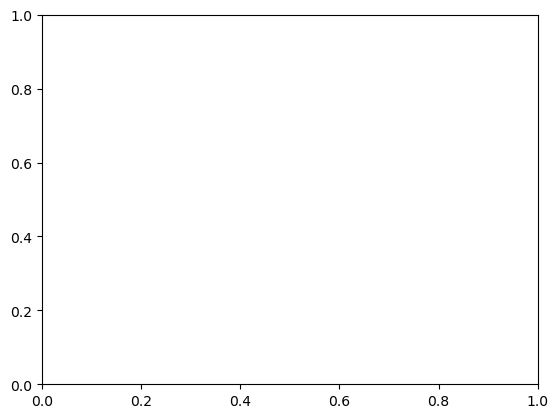

In [ ]:
pairs_df["noise_instance"]=pairs_df.apply(lambda x: (set(x[7]) & set(x[8])))
plt.hist(list(pairs_df["noise_instance"].values),bins=10)
plt.title("Number of shared instances per pair")
plt.show()

In [ ]:
pairs_df.columns

Index(['image1', 'image2', 'seq_name', 'dataset', 'segmentations1',
       'segmentations2', 'objects', 'present_objects1', 'present_objects2',
       'noise_instance'],
      dtype='object')

### Getting pairs with one content object

In [ ]:
df_freeform["nb_objects_content"]=df_freeform["list_object"].apply(lambda x: sum(1 for k in x if k in set_content))
df_freeform_val["nb_objects_content"]=df_freeform_val["list_object"].apply(lambda x: sum(1 for k in x if k in set_content))
df_freeform_test["nb_objects_content"]=df_freeform_test["list_object"].apply(lambda x: sum(1 for k in x if k in set_content))

plt.hist(df_freeform["nb_objects_content"].values,bins=np.unique(df_freeform["nb_objects_content"].values))
plt.show()
                                                                                            

/tmp/ipykernel_5504/3393196381.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  df_freeform["nb_objects_content"]=df_freeform["list_object"].apply(lambda x: sum(1 for k in x if k in set_content))


TypeError: 'DataFrameGroupBy' object does not support item assignment

In [ ]:
df_freeform_3c=df_freeform[df_freeform["nb_objects_content"]==3]
df_freeform_val_3c=df_freeform_val[df_freeform_val["nb_objects_content"]==3]
df_freeform_test_3c=df_freeform_test[df_freeform_test["nb_objects_content"]==3]
print(f"Number of train {df_freeform.shape[0]}, val {df_freeform_val.shape[0]}, test {df_freeform_test.shape[0]} samples")
print(f"Number of train {df_freeform_3c.shape[0]}, val {df_freeform_val_3c.shape[0]}, test {df_freeform_test_3c.shape[0]} samples with 3 content objects")

Number of train 107144, val 36375, test 52194 samples
Number of train 13770, val 4756, test 6147 samples with 3 content objects


In [ ]:
# understanding the distribution of classes
train_classes=list(itertools.chain.from_iterable(list(df_freeform_3c["list_object"].values)))
val_classes=list(itertools.chain.from_iterable(list(df_freeform_val_3c["list_object"].values)))
test_classes=list(itertools.chain.from_iterable(list(df_freeform_test_3c["list_object"].values)))
print(f"Number of different classes in train {len(np.unique(train_classes))}, validation {len(np.unique(val_classes))}, test {len(np.unique(test_classes))}")
total_classes=np.unique(list(itertools.chain.from_iterable(list(df_freeform_3c["list_object"].values)+list(df_freeform_val_3c["list_object"].values)+list(df_freeform_test_3c["list_object"].values))))
print(f"Total number of different classes {len(total_classes)}")

Number of different classes in train 55, validation 112, test 120
Total number of different classes 190


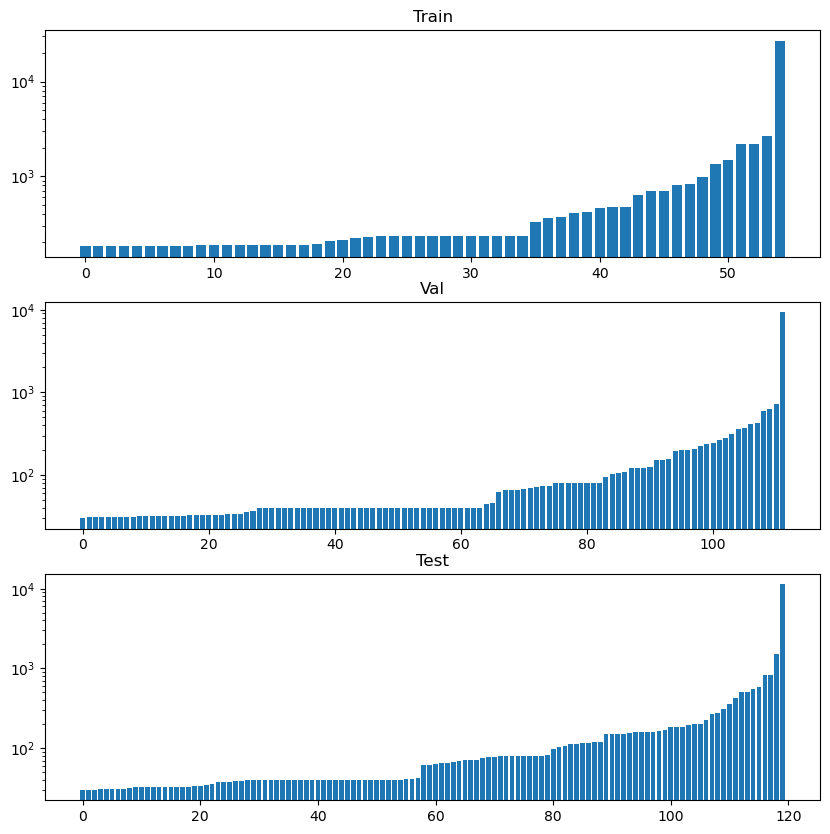

In [ ]:
# plot diversity of classes 
values_train, frequencies_train = np.unique(train_classes, return_counts=True)
order_train=np.argsort(frequencies_train)[::1]
sorted_train=values_train[order_train]
sorted_frequencies_train=frequencies_train[order_train]

values_val, frequencies_val = np.unique(val_classes, return_counts=True)
order_val=np.argsort(frequencies_val)#[::1]
sorted_val=values_val[order_val]
sorted_frequencies_val=frequencies_val[order_val]

values_test, frequencies_test = np.unique(test_classes, return_counts=True)
order_test=np.argsort(frequencies_test)#[::1]
sorted_test=values_test[order_test]
sorted_frequencies_test=frequencies_test[order_test]



fig, ax = plt.subplots(3,figsize=(10,10))
ax[0].bar(height=sorted_frequencies_train,x=np.arange(len(sorted_train)))
ax[1].bar(height=sorted_frequencies_val,x=np.arange(len(sorted_val)))
ax[2].bar(height=sorted_frequencies_test,x=np.arange(len(sorted_test)))
ax[0].set_title("Train")
ax[1].set_title("Val")
ax[2].set_title("Test")
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
plt.show()

In [ ]:
new_set_content=[x for x in set_content if x in np.unique(train_classes)]
new_set_style=[x for x in set_style if x in np.unique(train_classes)]
print(f'Number of content labels {len(new_set_content)}, style labels {len(new_set_style)}')

Number of content labels 14, style labels 41


### Positive pairs

In [ ]:
# do all pairs, then do subset with same background
# for each content labels check what proportion of images has them as content
# check how many of the image pairs have same background
pairs_images = list(itertools.combinations(df_freeform_3c['annotated_image_paths'].tolist(),2))
pairs_segmentations= list(itertools.combinations(df_freeform_3c['segmentations'].tolist(),2))
pairs_objects= list(itertools.combinations(df_freeform_3c['list_object'].tolist(),2))
pairs_dataset = list(itertools.combinations(df_freeform_3c['dataset'].tolist(),2))
pairs_sequence = list(itertools.combinations(df_freeform_3c["seq_name"].tolist(),2))
pairs_df_3c = pd.DataFrame({'image1': [p[0] for p in pairs_images], \
                            'image2': [p[1] for p in pairs_images],\
                            'segmentations1': [p[0] for p in pairs_segmentations], \
                            'segmentations2': [p[1] for p in pairs_segmentations], \
                            'dataset1': [p[0] for p in pairs_dataset], \
                            'dataset2': [p[1] for p in pairs_dataset], \
                            'seq_name1': [p[0] for p in pairs_sequence], \
                            'seq_name2': [p[1] for p in pairs_sequence], \
                            'objects1': [p[0] for p in pairs_objects], \
                            'objects2': [p[1] for p in pairs_objects], 
                           })


In [ ]:
pairs_df_3c["content"]=pairs_df_3c.apply(lambda x: list(set(x['objects1']) & set(x['objects2'])),axis=1)


In [ ]:
pairs_df_3c["shared_style"]=pairs_df_3c["content"].apply(lambda x: [k for k in x if k in new_set_style])
pairs_df_3c["content"]=pairs_df_3c["content"].apply(lambda x: [k for k in x if k in new_set_content])

In [ ]:
# stats : how many pairs of positives ? 
pairs_df_3c["size_content"]=pairs_df_3c["content"].apply(lambda x: len(x))
pairs_positives=pairs_df_3c[pairs_df_3c["size_content"]==3]



In [ ]:
print(f"Number of positive pairs {pairs_positives.shape[0]}")

Number of positive pairs 590833


In [ ]:
# # among these how many negatives ? 
# pairs_df_3c["size_content"]=pairs_df_3c["content"].apply(lambda x: len(x))
# pairs_negative=pairs_df_3c[pairs_df_3c["size_content"]==0]

# among these how many share the same background / same sequence ? 
pairs_positives["matching_seq"]=pairs_positives["seq_name1"]==pairs_positives["seq_name2"]
nb_pos_matching=pairs_positives[pairs_positives["matching_seq"]==True].shape[0]
print(f"Number of positives pairs with matching backgrounds: {nb_pos_matching}, ({nb_pos_matching/pairs_positives.shape[0]}%)")
# pairs_negative["matching_seq"]=pairs_negative.apply(lambda x: x["sequence1"] == x["sequence2"])
# nb_neg_matching=pairs_negative[pairs_negative["matching_seq"]==True].shape[0]
# print(f"Number of negatives pairs with matching backgrounds: {nb_neg_matching}, ({nb_neg_matching/pairs_negative.shape[0]}%)")



Number of positives pairs with matching backgrounds: 336024, (0.5687292348260845%)


/var/folders/3n/j0pgdynx1jnbhhdf5wlk64x00000gn/T/ipykernel_86255/1173762163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairs_positives["matching_seq"]=pairs_positives["seq_name1"]==pairs_positives["seq_name2"]


### Negative pairs
- pairs that contain no content objects
- for each image in the positive batch, how many potential negatives: do an average of that

In [ ]:
# get all object list for each image involved in positive pairs
unique_content_arrangements=pairs_positives["content"].values
tmp_unique=[]
for i in unique_content_arrangements:
    if i in tmp_unique:
        pass
    else: tmp_unique.append(i)
    
images_positives=pd.DataFrame({"content_list":tmp_unique,"number_negatives":np.zeros(len(tmp_unique))})
print(f"Number of content arrangements found in positives pairs : {len(tmp_unique)}")                                                              

Number of content arrangements found in positives pairs : 16


In [ ]:
for i, arr in enumerate(tmp_unique):
    print(i)
    n=0
    for j, tmp_list in enumerate(df_freeform["list_object"].values):
        #print(list(set(arr) & set(tmp_list)),set(tmp_list),set(arr))
        if len(list(set(arr) & set(tmp_list))) == 0: n+=1
        images_positives.iloc[[i]]["number_negatives"]=n

0


/var/folders/3n/j0pgdynx1jnbhhdf5wlk64x00000gn/T/ipykernel_86255/2855429388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  images_positives.iloc[[i]]["number_negatives"]=n


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [ ]:
images_positives.iloc[[i]]["number_negatives"]

15    0.0
Name: number_negatives, dtype: float64